In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



In [8]:
data = {
    'year': [2020, 2021, 2022, 2023, 2024, 2025],
    'sales': [15000, 18000, 22000, 26000, 30000, 32000],
    'ad_spent': [10, 12, 20, 25, 30, 35],        # in thousand ₹
    'employees': [8, 9, 11, 13, 15, 16],          # number of employees
    'growth_rate': [3, 5, 7, 8, 9, 10]  
}

df= pd.DataFrame(data)



In [11]:
df["label"]=[ 1 if i > 20000 else 0 for i in data["sales"]]

In [12]:
df

,year,sales,ad_spent,employees,growth_rate,label
0,2020,15000,10,8,3,0
1,2021,18000,12,9,5,0
2,2022,22000,20,11,7,1
3,2023,26000,25,13,8,1
4,2024,30000,30,15,9,1
5,2025,32000,35,16,10,1


In [13]:
x = df [['year', 'ad_spent', 'employees', 'growth_rate']]
y = df['label']



In [21]:
model = DecisionTreeClassifier(criterion='gini', random_state=0)

model.fit(x,y)

ypred = model.predict(x)

In [22]:
acc = r2_score(y,ypred)
print("R2 Score:", acc)

R2 Score: 1.0


In [20]:
ypred = [[2026, 40, 18, 12]]
predd= model.predict(ypred)
print("Prediction for year 2026:", predd)

Prediction for year 2026: [1]


c:\anaconda\envs\ocr_summarizer\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


  Weekend Weather Parents Money  Decision
0      W1   Sunny     Yes  Rich    Cinema
1      W2   Sunny      No  Rich    Tennis
2      W3   Windy     Yes  Rich    Cinema
3      W4   Rainy     Yes  Poor    Cinema
4      W5   Rainy      No  Rich   Stay In
5      W6   Rainy     Yes  Poor    Cinema
6      W7   Windy      No  Poor    Cinema
7      W8   Windy      No  Rich  Shopping
8      W9   Windy      No  Rich    Cinema
9     W10   Sunny      No  Rich    Tennis
Confusion Matrix:
 [[6 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 2]]
Accuracy: 90.0 %
Predicted Decision: Cinema


c:\anaconda\envs\ocr_summarizer\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


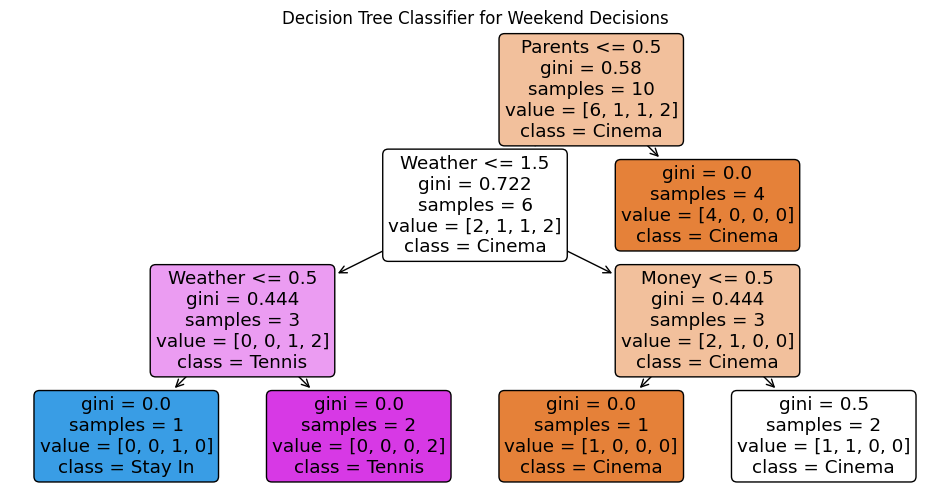

NameError: name 'cm' is not defined

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix

# Step 1: Create dataset
data = {
    'Weekend': ['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10'],
    'Weather': ['Sunny','Sunny','Windy','Rainy','Rainy','Rainy','Windy','Windy','Windy','Sunny'],
    'Parents': ['Yes','No','Yes','Yes','No','Yes','No','No','No','No'],
    'Money': ['Rich','Rich','Rich','Poor','Rich','Poor','Poor','Rich','Rich','Rich'],
    'Decision': ['Cinema','Tennis','Cinema','Cinema','Stay In','Cinema','Cinema','Shopping','Cinema','Tennis']
}

df = pd.DataFrame(data)

print(df)

# Step 2: Encode categorical variables
le_weather = LabelEncoder()
le_parents = LabelEncoder()
le_money = LabelEncoder()
le_decision = LabelEncoder()

df['Weather_enc'] = le_weather.fit_transform(df['Weather'])
df['Parents_enc'] = le_parents.fit_transform(df['Parents'])
df['Money_enc'] = le_money.fit_transform(df['Money'])
df['Decision_enc'] = le_decision.fit_transform(df['Decision'])

# Step 3: Split into X and y
X = df[['Weather_enc', 'Parents_enc', 'Money_enc']]
y = df['Decision_enc']

# Step 4: Create and train model
model = DecisionTreeClassifier(criterion='gini', random_state=0)
model.fit(X, y)

# Step 5: Predict on training data
y_pred = model.predict(X)

# Step 6: Check accuracy
accuracy = accuracy_score(y, y_pred)

acc = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", acc)
print("Accuracy:", round(accuracy * 100, 2), "%")

# Step 7: Predict for a new sample
# Example: Weather='Sunny', Parents='Yes', Money='Rich'
new_sample = [[le_weather.transform(['Sunny'])[0], le_parents.transform(['Yes'])[0], le_money.transform(['Rich'])[0]]]
pred = model.predict(new_sample)
print("Predicted Decision:", le_decision.inverse_transform(pred)[0])

# Step 8: Visualize the tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['Weather','Parents','Money'],
          class_names=le_decision.classes_, filled=True, rounded=True)
plt.title("Decision Tree Classifier for Weekend Decisions")
plt.show()
